In [23]:
import sys

from hfinger.analysis import hfinger_analyze

import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering
from difflib import SequenceMatcher
import jellyfish

In [32]:
# Attention remplacer liste_Arguments par sys.argv si en dehors de Jupiter
liste_Arguments = ["blabla","GlobeImposter","legitimeFirefox","legitimeSafari"]

pcap_path = arg
reporting_mode = 4
fingerprints = [i.get('fingerprint') for i in hfinger_analyze(pcap_path,reporting_mode)]


# formatage du dataset
df = []

for i in fingerprints:
    fp = i.split("|")
    fp = list(map(lambda x : x if x != '' else 0, fp))
    df.append(fp)

df = pd.DataFrame(data=df)

['/usr/lib/python3.10/site-packages/ipykernel_launcher.py', '-f', '/home/loucas/.local/share/jupyter/runtime/kernel-dcd758dc-7a06-4c51-92a4-5fef6540f170.json']


'\nreporting_mode = 4\nfingerprints = [i.get(\'fingerprint\') for i in hfinger_analyze(pcap_path,reporting_mode)]\n\n\n# formatage du dataset\ndf = []\n\nfor i in fingerprints:\n    fp = i.split("|")\n    fp = list(map(lambda x : x if x != \'\' else 0, fp))\n    df.append(fp)\n\ndf = pd.DataFrame(data=df)\n'

In [24]:
# Fonction de calcul de distance avec sequenceMatcher

def distance(f1,f2):
    return(1-SequenceMatcher(None,f1,f2).ratio()) # isjunk=None (no element ignored), .ratio give float between [0,1]

In [28]:
# Fonction de calcul de distance avec levenshtein
def distance(f1,f2):
    return(jellyfish.levenshtein_distance(f1,f2))


In [15]:
#to use jaro distance
def distance(f1,f2):
    return(jellyfish.jaro_similarity(f1,f2))

In [5]:
#Use damerau levenstein distance
def distance(f1,f2):
    return(jellyfish.damerau_levenshtein_distance(f1,f2))

In [25]:
# Fonction d'affichage du dendogramme
def plot_dendrogram(model, **kwargs):

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
                counts[i] = current_count

                linkage_matrix = np.column_stack(
                [model.children_, model.distances_, counts]
                ).astype(float)

                # Plot the corresponding dendrogram
                dendrogram(linkage_matrix, **kwargs)

In [29]:
# Formatage des empreintes
listOfFingerprints=[]
listWithAllTaggedFingerprints=[]

for z in liste_Arguments[1:]:
    filePath = "files/"+z
    with open(filePath, "r") as file:
        listOfFingerprintsInFile = [line.replace('\n', '') for line in file]
        listOfFingerprintsInFile = list(set(listOfFingerprintsInFile)) # retire les doublons
    listOfFingerprints.extend(listOfFingerprintsInFile)
    listWithAllTaggedFingerprints.extend([[y, filePath] for y in listOfFingerprintsInFile])


# Création de la matrice de distances
listDistances=[] # Chaque liste contient l'ensemble des distances par rapport a une empreinte.
for fingerprint in listOfFingerprints:
    listOfDist=[]
    for fingerprint2 in listOfFingerprints:
        listOfDist.append(distance(fingerprint,fingerprint2))                    
    listDistances.append(listOfDist)
    
print(listDistances)

[[0, 48, 44, 17, 79, 81, 84, 82, 79, 82, 79, 84, 81, 85, 82, 84, 84, 85, 81, 81, 85, 74, 78, 85, 79, 80, 79, 85, 80, 80, 81, 82, 84, 79, 75, 74, 80, 81, 78, 76, 76, 76, 71, 74, 75, 76, 75, 75, 76, 73, 77, 71, 76, 73, 72, 73, 76, 72, 74, 70, 75, 70, 74, 72, 77, 76, 76, 71, 76, 71, 75, 76, 73, 76, 77, 76, 70, 75, 76, 73, 73, 73, 76, 76, 76, 74, 70, 75, 76, 73, 76, 72, 70, 73, 75, 72, 72, 70, 71, 75, 70, 72, 74, 73, 70, 71, 73, 77, 74, 74, 72, 74, 78, 69, 76, 75], [48, 0, 62, 47, 90, 86, 85, 83, 90, 87, 90, 89, 86, 86, 83, 85, 89, 89, 86, 86, 89, 83, 83, 89, 83, 89, 89, 89, 86, 86, 85, 83, 85, 90, 80, 83, 86, 86, 86, 78, 78, 81, 77, 75, 80, 78, 80, 77, 78, 78, 78, 76, 75, 77, 81, 78, 78, 82, 78, 81, 76, 77, 75, 78, 78, 78, 78, 77, 78, 77, 80, 78, 78, 78, 80, 78, 75, 80, 78, 78, 82, 77, 75, 78, 78, 78, 73, 78, 78, 77, 78, 76, 75, 82, 80, 78, 81, 77, 77, 80, 76, 79, 76, 78, 75, 77, 76, 79, 78, 78, 82, 75, 77, 72, 78, 76], [44, 62, 0, 46, 82, 85, 86, 83, 82, 86, 82, 85, 85, 87, 83, 86, 85, 8


cluster number 0
2|4|1|cur||GE|1|ho,ac,co,ck,us-ag,ac-la,re,ac-en|ac:89a50fbb/co:ke-al/us-ag:eb773a5f/ac-la:517875c5/ac-en:gz,de||| files/legitimeSafari
2|2|2|||GE|1|ho,d90d2d7a,ac,us-ag,ac-la,ac-en,co|ac:as-as/us-ag:ede8e2dc/ac-la:517875c5/ac-en:gz,de/co:ke-al||| files/legitimeSafari
1|3|1|css|0.0|GE|1|ho,ac,co,ck,us-ag,ac-la,re,ac-en|ac:c03a46e1/co:ke-al/us-ag:eb773a5f/ac-la:517875c5/ac-en:gz,de||| files/legitimeSafari
2|4|1|||GE|1|ho,ck,co,u-i-r,ac,us-ag,re,ac-la,ac-en|co:ke-al/ac:de6738ac/us-ag:eb773a5f/ac-la:517875c5/ac-en:gz,de||| files/legitimeSafari
2|5|1|js||GE|1|ho,ac,co,ck,us-ag,ac-la,re,ac-en|ac:as-as/co:ke-al/us-ag:eb773a5f/ac-la:517875c5/ac-en:gz,de||| files/legitimeSafari
2|5|1|css|0.0|GE|1|ho,ac,co,ck,us-ag,ac-la,re,ac-en|ac:c03a46e1/co:ke-al/us-ag:eb773a5f/ac-la:517875c5/ac-en:gz,de||| files/legitimeSafari
2|6|1|gif||GE|1|ho,ac,co,ck,us-ag,ac-la,re,ac-en|ac:89a50fbb/co:ke-al/us-ag:eb773a5f/ac-la:517875c5/ac-en:gz,de||| files/legitimeSafari
2|3|1|css|0.0|GE|1|ho,ac,co,

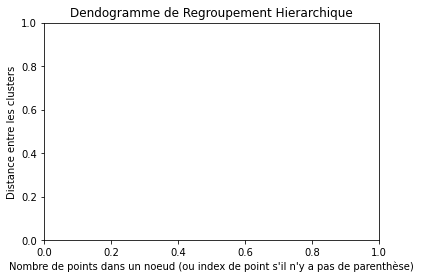

In [27]:
# Création du modèle
model = AgglomerativeClustering(distance_threshold=None, n_clusters=3) # n_cluster= number of cluster to find, if not none distance must be none. 
model = model.fit(listDistances) 


# Affichage
plt.title("Dendogramme de Regroupement Hierarchique")
#plot_dendrogram(model, truncate_mode="level", p=10) # plot the top ten levels of the dendrogram
plt.xlabel("Nombre de points dans un noeud (ou index de point s'il n'y a pas de parenthèse)")
plt.ylabel("Distance entre les clusters")
#plt.show()
#print(model.n_clusters_)
#print(model.labels_)
for k in range(model.n_clusters_):
    print("\ncluster number "+str(k))
    for p in range(len(listOfFingerprints)):
        if model.labels_[p]==k:
            print(listOfFingerprints[p]+' '+listWithAllTaggedFingerprints[p][1])